In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline
import pandas as pd
cust_df = pd.read_csv("insurance.csv")
cust_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
cust_df['smoker'] = np.where(cust_df['smoker'] == "yes", 1, 0)
cust_df['sex'] = np.where(cust_df['sex'] == "male", 1, 0)

cust_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [3]:
df = cust_df.drop('region', axis=1)
df.head(10)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
6,46,0,33.440,1,0,8240.58960
7,37,0,27.740,3,0,7281.50560
8,37,1,29.830,2,0,6406.41070
9,60,0,25.840,0,0,28923.13692


In [4]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         0.2985838 ],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
        -0.95368917],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
        -0.72867467],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
        -0.96159623],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
        -0.93036151],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
         1.31105347]])

In [5]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 1 ... 1 1 0]


In [6]:
df["Clus_km"] = labels
df.head(10)

,age,sex,bmi,children,smoker,charges,Clus_km
0,19,0,27.900,0,1,16884.92400,0
1,18,1,33.770,1,0,1725.55230,1
2,28,1,33.000,3,0,4449.46200,1
3,33,1,22.705,0,0,21984.47061,0
4,32,1,28.880,0,0,3866.85520,1
5,31,0,25.740,0,0,3756.62160,1
6,46,0,33.440,1,0,8240.58960,1
7,37,0,27.740,3,0,7281.50560,1
8,37,1,29.830,2,0,6406.41070,1
9,60,0,25.840,0,0,28923.13692,0


In [7]:
df.groupby('Clus_km').mean()

,age,sex,bmi,children,smoker,charges
Clus_km,,,,,,
0,45.563518,0.456026,29.111498,1.081433,0.397394,18505.711805
1,36.743383,0.498274,30.432031,1.086306,0.000000,6296.017814
2,40.376543,0.635802,34.845432,1.166667,0.938272,40761.308558


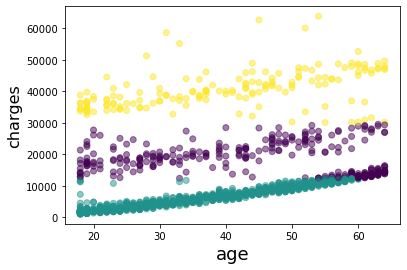

In [8]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, -1], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('age', fontsize=18)
plt.ylabel('charges', fontsize=16)

plt.show()

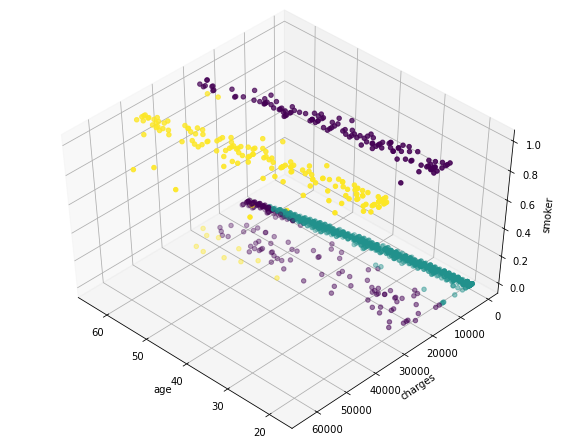

In [9]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('age')
ax.set_ylabel('charges')
ax.set_zlabel('smoker')

ax.scatter(X[:, 0], X[:, -1], X[:, -2], c= labels.astype(np.float))
